In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import nltk

In [2]:
names = pd.read_csv('names_dataset.csv')
names.head()

,index,name,sex
0,0,Mary,F
1,1,Anna,F
2,2,Emma,F
3,3,Elizabeth,F
4,4,Minnie,F


In [3]:
names['name'][0][-1]

'y'

In [4]:
def feature_last(name):
    return name[-1]

first = lambda x:x[0].lower()

In [5]:
names['Last'] = names['name'].apply(feature_last)
#names['first'] = names['name'].apply(first)
names.head()

,index,name,sex,Last
0,0,Mary,F,y
1,1,Anna,F,a
2,2,Emma,F,a
3,3,Elizabeth,F,h
4,4,Minnie,F,e


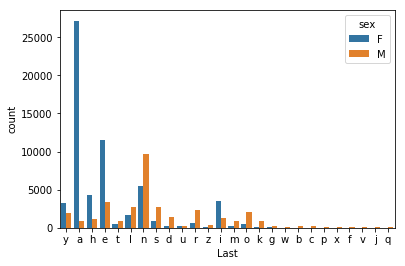

In [6]:
sns.countplot(x='Last',data=names,hue='sex')

In [7]:
from nltk import ngrams

In [8]:
list(ngrams('srikanth',2))

[('s', 'r'),
 ('r', 'i'),
 ('i', 'k'),
 ('k', 'a'),
 ('a', 'n'),
 ('n', 't'),
 ('t', 'h')]

In [9]:
def bigram(name):
    bi = list(ngrams(name,2))
    return["".join(gram) for gram in bi]

def trigram(name):
    tri = list(ngrams(name,3))
    return["".join(gram) for gram in tri]

In [10]:
name = 'srikanth'
gram = bigram(name)+trigram(name)
print(gram)

['sr', 'ri', 'ik', 'ka', 'an', 'nt', 'th', 'sri', 'rik', 'ika', 'kan', 'ant', 'nth']


In [11]:
female = names[names['sex']=='F'].iloc[:1000]
male = names[names['sex']=='M'].iloc[:1000]

df = pd.concat((female,male),axis=0,ignore_index=True)

In [12]:
df['sex'].value_counts()

F    1000
M    1000
Name: sex, dtype: int64

In [13]:
def feature(name):
    gram = bigram(name)+trigram(name)+[feature_last(name)]
    return gram

In [14]:
# Extracting all features
fset = []
for name in df['name']:
    name = name.lower()
    f = feature(name)
    fset.extend(f)

In [15]:
len(set(fset))

2185

In [16]:
print(fset)

['ma', 'ar', 'ry', 'mar', 'ary', 'y', 'an', 'nn', 'na', 'ann', 'nna', 'a', 'em', 'mm', 'ma', 'emm', 'mma', 'a', 'el', 'li', 'iz', 'za', 'ab', 'be', 'et', 'th', 'eli', 'liz', 'iza', 'zab', 'abe', 'bet', 'eth', 'h', 'mi', 'in', 'nn', 'ni', 'ie', 'min', 'inn', 'nni', 'nie', 'e', 'ma', 'ar', 'rg', 'ga', 'ar', 're', 'et', 'mar', 'arg', 'rga', 'gar', 'are', 'ret', 't', 'id', 'da', 'ida', 'a', 'al', 'li', 'ic', 'ce', 'ali', 'lic', 'ice', 'e', 'be', 'er', 'rt', 'th', 'ha', 'ber', 'ert', 'rth', 'tha', 'a', 'sa', 'ar', 'ra', 'ah', 'sar', 'ara', 'rah', 'h', 'an', 'nn', 'ni', 'ie', 'ann', 'nni', 'nie', 'e', 'cl', 'la', 'ar', 'ra', 'cla', 'lar', 'ara', 'a', 'el', 'll', 'la', 'ell', 'lla', 'a', 'fl', 'lo', 'or', 're', 'en', 'nc', 'ce', 'flo', 'lor', 'ore', 'ren', 'enc', 'nce', 'e', 'co', 'or', 'ra', 'cor', 'ora', 'a', 'ma', 'ar', 'rt', 'th', 'ha', 'mar', 'art', 'rth', 'tha', 'a', 'la', 'au', 'ur', 'ra', 'lau', 'aur', 'ura', 'a', 'ne', 'el', 'll', 'li', 'ie', 'nel', 'ell', 'lli', 'lie', 'e', 'gr', 'r

In [17]:
from collections import defaultdict

In [18]:
frame = defaultdict(lambda:defaultdict(lambda:0))

In [19]:
#frame['srikanth']['sri']=1
#frame

In [20]:
# Extracting all features
for name in df['name']:
    name = name.lower()
    for key in fset:
        frame[name][key] = 0

In [21]:
# Extracting all features
for name in df['name']:
    name = name.lower()
    f = feature(name)
    for fkey in f:
        frame[name][fkey] += 1

In [22]:
dframe = pd.DataFrame(frame).T # T is transpose

In [23]:
dframe.head()

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
mary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anna,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
emma,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
elizabeth,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
minnie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
x = dframe.iloc[:,:].values
y = df['sex'].values

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
model = MultinomialNB()

In [27]:
model.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
test = defaultdict(lambda: defaultdict(lambda:0))
name = 'Rishika'
name = name.lower()
for key in fset:
    test[name][key] = 0.0
    
f = feature(name)
for fkey in f:
    if fkey in fset:
        test[name][fkey] += 1.0
    
test_array = pd.DataFrame(test).T.values

In [29]:
len(set(fset))

2185

In [30]:
pd.DataFrame(test).T

,a,aa,aac,aar,ab,abb,abe,abi,abl,abn,...,zoe,zol,zon,zor,zr,zra,zu,zul,zz,zzi
rishika,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
model.predict(test_array)

array(['F'], 
      dtype='<U1')